Research idea source: https://www.barrons.com/articles/robot-jobs-51671667349

# OLS Estimation (Automation Robotics Stock and Flow under Economic Policy Uncertainty)
## Preliminary Estimation

In [1]:
# Load Python Libiaries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import pandas_datareader.data as web 
import datetime as dt 

# 1. Simplified case - annualized U.S. robotics data (aggregate all industrial-level robotics data into one single time series)

In [4]:
df_robotics_ann = pd.read_csv("Robotics_annualized.csv")
df_robotics_ann.set_index('Year', inplace=True)
df_robotics_ann.head(2)

,installations,operational_stock
Year,,
1993,10492,86908
1994,13352,98260


In [9]:
start, end = dt.datetime(1993, 1, 1), dt.datetime(2022, 1, 1) # define the time frame
df_epu_daily = web.DataReader("USEPUINDXD", "fred", start, end)

In [10]:
df_epu_daily.head(2)


,USEPUINDXD
DATE,
1993-01-01,86.04
1993-01-02,153.57


## Frequency reduction - EPU

In [11]:
df_epu_annual = df_epu_daily.resample('Y').mean()
df_epu_annual.head()

,USEPUINDXD
DATE,
1993-12-31,120.409945
1994-12-31,94.450082
1995-12-31,89.025233
1996-12-31,75.368880
1997-12-31,67.673918


In [12]:
df_epu_annual['Year'] = df_epu_annual.index.year
df_epu_annual.set_index('Year', inplace=True)

In [13]:
df_epu_annual.head() #EPU annual

,USEPUINDXD
Year,
1993,120.409945
1994,94.450082
1995,89.025233
1996,75.368880
1997,67.673918


In [14]:
df_robotics_ann.head()

,installations,operational_stock
Year,,
1993,10492,86908
1994,13352,98260
1995,17630,113890
1996,16770,121930
1997,21446,132788


In [15]:
df_merged_ann=pd.merge(df_robotics_ann,df_epu_annual, how='left', left_on=['Year'], right_on=['Year'])


In [17]:
# df_merged_ann

In [18]:
# log transformation
df_merged_ann = np.log(df_merged_ann)
df_merged_ann.head(3)


,installations,operational_stock,USEPUINDXD
Year,,,
1993,9.258368,11.372605,4.790902
1994,9.499421,11.495372,4.548071
1995,9.777357,11.642988,4.488920


<Axes: xlabel='Year'>

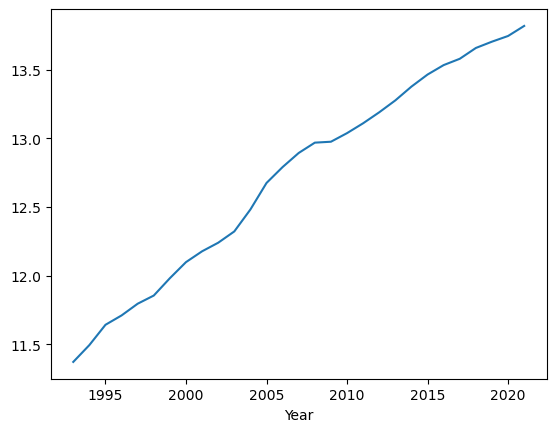

In [21]:
df_merged_ann["operational_stock"].plot()

In [ ]:
## OLS: Robotics = EPU

In [19]:
results = smf.ols(formula = "operational_stock ~ USEPUINDXD", data=df_merged_ann, missing='drop').fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      operational_stock   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     2.881
Date:                Tue, 28 Nov 2023   Prob (F-statistic):              0.101
Time:                        19:50:02   Log-Likelihood:                -31.248
No. Observations:                  29   AIC:                             66.50
Df Residuals:                      27   BIC:                             69.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.8627      1.691      5.832      0.0

# 2. U.S. 'Industry-Annual level' Robotics Data

In [23]:
df_robotics_ann_ind = pd.read_csv("Robotics_annualized_industrial.csv")
df_robotics_ann_ind.set_index('Year', inplace=True)
df_robotics_ann_ind

,industry,installations,operational_stock,industry_encoded
Year,,,,
1993,All Industries,5246,43454,All Industries
1994,All Industries,6676,49130,All Industries
1995,All Industries,8815,56945,All Industries
1996,All Industries,8385,60965,All Industries
1997,All Industries,10723,66394,All Industries
...,...,...,...,...
2017,other chemical products n.e.c.,10,169,other chemical products n.e.c.
2018,other chemical products n.e.c.,16,185,other chemical products n.e.c.
2019,other chemical products n.e.c.,15,200,other chemical products n.e.c.


In [24]:
df_merged_ann_ind=pd.merge(df_robotics_ann_ind,df_epu_annual, how='left', left_on=['Year'], right_on=['Year'])

In [25]:
df_merged_ann_ind

,industry,installations,operational_stock,industry_encoded,USEPUINDXD
Year,,,,,
1993,All Industries,5246,43454,All Industries,120.409945
1994,All Industries,6676,49130,All Industries,94.450082
1995,All Industries,8815,56945,All Industries,89.025233
1996,All Industries,8385,60965,All Industries,75.368880
1997,All Industries,10723,66394,All Industries,67.673918
...,...,...,...,...,...
2017,other chemical products n.e.c.,10,169,other chemical products n.e.c.,97.784466
2018,other chemical products n.e.c.,16,185,other chemical products n.e.c.,92.257014
2019,other chemical products n.e.c.,15,200,other chemical products n.e.c.,108.860521


In [26]:
df_merged_ann_ind["log_Robotic_Stock"] = np.log(1+df_merged_ann_ind["operational_stock"])
df_merged_ann_ind["log_Robotic_Flow"] = np.log(1+df_merged_ann_ind["installations"])
df_merged_ann_ind["log_EPU"] = np.log(1+df_merged_ann_ind["USEPUINDXD"])

In [27]:
df_merged_ann_ind.head()

,industry,installations,operational_stock,industry_encoded,USEPUINDXD,log_Robotic_Stock,log_Robotic_Flow,log_EPU
Year,,,,,,,,
1993,All Industries,5246,43454,All Industries,120.409945,10.679481,8.565412,4.799173
1994,All Industries,6676,49130,All Industries,94.450082,10.802245,8.806424,4.558603
1995,All Industries,8815,56945,All Industries,89.025233,10.949859,9.084324,4.500090
1996,All Industries,8385,60965,All Industries,75.368880,11.018072,9.034319,4.335575
1997,All Industries,10723,66394,All Industries,67.673918,11.103377,9.280239,4.229369


# Question: is the sign of EPU appropriate???

In [28]:
results = smf.ols(formula = "log_Robotic_Stock ~ log_EPU", data=df_merged_ann_ind, missing='drop').fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      log_Robotic_Stock   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     66.21
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.06e-15
Time:                        20:00:15   Log-Likelihood:                -3243.8
No. Observations:                1131   AIC:                             6492.
Df Residuals:                    1129   BIC:                             6502.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.7337      1.586     -5.508      0.0

In [ ]:
# # Sort the DataFrame by 'industry' and 'Year' to ensure proper lag calculation
# df_merged_ann_ind.sort_values(by=['industry', 'Year'], inplace=True)

# # Create a lag variable within each industry
# df_merged_ann_ind['lag_log_EPU'] = df_merged_ann_ind.groupby('industry')['log_EPU'].shift()

In [ ]:
# df_merged_ann_ind

In [ ]:
# results = smf.ols(formula = "log_Robotic_Stock ~ lag_log_EPU", data=df_merged_ann_ind, missing='drop').fit()
# print(results.summary())

# 3. Full Dataset with control variables
\begin{equation}
    Automation_{i, t} = \alpha + \beta * EPU_{t-1} + \gamma \sum_i^n X_{i,t-1}  + fe_i +   \mu 
\end{equation}

In [30]:
df_robotics_full = pd.read_csv("Robotics_full_data.csv")
df_robotics_full

,Year,industry,installations,operational_stock,industry_encoded,Three_Component_Index,News_Based_Policy_Uncert_Index,FedStateLocal_Ex_disagreement,CPI_disagreement,Tax_expiration,...,oas_aaa,oas_euro,yield3m,yield6m,yield1y,l_oas_aaa,l_oas_euro,l_yield3m,l_yield6m,l_yield1y
0,1993,All Industries,5246.0,43454.0,All Industries,107.450182,102.294445,155.860128,98.616266,15.748523,...,NaN,NaN,3.00,3.12,3.29,NaN,NaN,3.43,3.54,3.71
1,1994,All Industries,6676.0,49130.0,All Industries,89.985716,87.571007,114.632441,87.564443,12.899085,...,NaN,NaN,4.25,4.64,5.02,NaN,NaN,3.00,3.12,3.29
2,1995,All Industries,8815.0,56945.0,All Industries,81.106291,83.185570,74.706389,85.580783,15.081329,...,NaN,NaN,5.49,5.56,5.60,NaN,NaN,4.25,4.64,5.02
3,1996,All Industries,8385.0,60965.0,All Industries,75.214323,75.833360,79.627639,77.079381,4.852955,...,NaN,NaN,5.01,5.08,5.22,NaN,NaN,5.49,5.56,5.60
4,1997,All Industries,10723.0,66394.0,All Industries,76.227345,78.506979,63.359069,83.313742,19.217816,...,0.31,NaN,5.06,5.18,5.32,NaN,NaN,5.01,5.08,5.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,1990,NaN,NaN,NaN,NaN,118.672294,117.471275,135.548035,120.379856,13.494805,...,NaN,NaN,7.50,7.46,7.35,NaN,NaN,8.11,8.03,7.92
1162,1991,NaN,NaN,NaN,NaN,115.400028,117.196453,134.187748,108.591245,13.494805,...,NaN,NaN,5.38,5.44,5.52,NaN,NaN,7.50,7.46,7.35
1163,1992,NaN,NaN,NaN,NaN,113.438205,116.613196,135.173454,96.349226,73.645135,...,NaN,NaN,3.43,3.54,3.71,NaN,NaN,5.38,5.44,5.52
1164,2022,NaN,NaN,NaN,NaN,162.156707,184.359071,100.257158,136.227604,282.284139,...,0.63,4.99,2.02,2.44,2.68,0.50,3.15,0.05,0.06,0.10


In [31]:
pd.set_option('display.max_columns', None)
df_robotics_full.head(2)

,Year,industry,installations,operational_stock,industry_encoded,Three_Component_Index,News_Based_Policy_Uncert_Index,FedStateLocal_Ex_disagreement,CPI_disagreement,Tax_expiration,GEPU_current,GEPU_ppp,log_installations,log_operational_stock,log_Three_Component_Index,log_News_Based_EPU_Index,log_FedStLocal_Ex_disag,log_CPI_disagreement,log_Tax_expiration,log_GEPU_current,log_GEPU_ppp,working_age_popu,population,emp_pop_ratio,GDP,real_GDP,int10yr,int1yr,cpi,fertility,women,unemploy,log_working_age_pop,log_population,log_GDP,log_real_GDP,popu_growth,working_age_popu_growth,GDP_growth,real_GDP_growth,int10yr_growth,int1yr_growth,emp_pop_growth,l_log_working_age_pop,l_log_population,l_log_GDP,l_log_real_GDP,l_popu_growth,l_working_age_popu_growth,l_emp_pop_ratio,l_GDP_growth,l_real_GDP_growth,l_cpi,l_int10yr,l_int1yr,l_unemploy,l_women,l_fertility,GDP_disper_1,GDP_disper_2,l_GDP_disper_1,l_GDP_disper_2,JLN_real_h1,JLN_real_h3,JLN_real_h12,JLN_fin_h1,JLN_fin_h3,JLN_fin_h12,JLN_macro_h1,JLN_macro_h3,JLN_macro_h12,vix,vol_ann,l_vix,l_vol_ann,resi_EPU_threecomp,resi_EPU_news,resi_EPU_fedstlocal,resi_EPU_cpi,resi_EPU_tax,hat_EPU_threecomp,hat_EPU_news,hat_EPU_fedstlocal,hat_EPU_cpi,hat_EPU_tax,my_pola1,my_pola2,new_pola1,lognew_pola1,new_pola2,lognew_pola2,three_pola1,logthree_pola1,three_pola2,logthree_pola2,oas_aaa,oas_euro,yield3m,yield6m,yield1y,l_oas_aaa,l_oas_euro,l_yield3m,l_yield6m,l_yield1y
0,1993,All Industries,5246.0,43454.0,All Industries,107.450182,102.294445,155.860128,98.616266,15.748523,NaN,NaN,8.565412,10.679482,4.677027,4.627855,5.048959,4.591236,2.756747,NaN,NaN,165052704.0,261796.0,62.000000,7013.7378,10097.362,2.720116,0.947942,0.0,2.0195,58.400002,6.5,18.921776,12.475321,8.855626,9.220030,0.012492,0.009462,0.048633,0.025742,-0.254852,-0.148378,0.009725,18.912313,12.462829,8.806994,9.194287,0.013461,0.009034,61.400002,0.064333,0.042893,-0.070423,3.509685,1.099567,7.4,57.900002,2.0460,0.29,0.46,0.32,0.58,0.552546,0.661782,0.824556,0.691271,0.772311,0.922945,0.552059,0.68117,0.854305,12.69,9.947115,15.45,12.995750,4.354005,-1.013559,58.220192,0.681747,-180.72430,114.83560,120.53060,98.256981,96.050911,293.86102,0.646277,0.559428,75.929848,4.328147,80.001389,4.380200,81.513184,4.398917,84.561806,4.434946,NaN,NaN,3.00,3.12,3.29,NaN,NaN,3.43,3.54,3.71
1,1994,All Industries,6676.0,49130.0,All Industries,89.985716,87.571007,114.632441,87.564443,12.899085,NaN,NaN,8.806424,10.802245,4.499651,4.472450,4.741731,4.472375,2.557156,NaN,NaN,166573760.0,264924.0,63.099998,7455.2881,10512.962,4.116953,2.014017,0.0,2.0015,58.700001,5.5,18.930948,12.487198,8.916678,9.260364,0.011877,0.009173,0.061053,0.040335,0.414439,0.753593,0.017586,18.921776,12.475321,8.855626,9.220030,0.012492,0.009462,62.000000,0.048633,0.025742,0.000000,2.720116,0.947942,6.5,58.400002,2.0195,0.46,0.78,0.29,0.46,0.537276,0.656669,0.828930,0.690678,0.771759,0.921501,0.553676,0.68941,0.867686,13.93,9.037936,12.69,9.947115,-16.403347,-21.107843,16.857637,-9.994668,-194.24815,115.26743,123.75117,94.844475,94.337723,268.62585,0.616426,0.478949,86.813370,4.461828,88.443611,4.481586,93.738609,4.539641,94.837250,4.551266,NaN,NaN,4.25,4.64,5.02,NaN,NaN,3.00,3.12,3.29


## OLS regression with controls

In [32]:
# Robotics = EPU(t)
results = smf.ols(formula = "log_operational_stock ~ log_Three_Component_Index + l_real_GDP_growth +l_working_age_popu_growth +l_popu_growth +l_emp_pop_ratio +l_cpi + l_int10yr+ l_int1yr", data=df_robotics_full, missing='drop').fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     log_operational_stock   R-squared:                       0.473
Model:                               OLS   Adj. R-squared:                  0.470
Method:                    Least Squares   F-statistic:                     126.1
Date:                   Tue, 28 Nov 2023   Prob (F-statistic):          1.61e-150
Time:                           20:06:10   Log-Likelihood:                -2913.3
No. Observations:                   1131   AIC:                             5845.
Df Residuals:                       1122   BIC:                             5890.
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [33]:
# Create lags on EPU
# Sort the DataFrame by 'industry' and 'Year' to ensure proper lag calculation
df_robotics_full.sort_values(by=['industry', 'Year'], inplace=True)

# Create a lag variable within each industry
df_robotics_full['lag_log_EPU'] = df_robotics_full.groupby('industry')['log_Three_Component_Index'].shift()

In [34]:
# Robotics = EPU(t-1)
results = smf.ols(formula = "log_operational_stock ~ lag_log_EPU + l_real_GDP_growth +l_working_age_popu_growth +l_popu_growth +l_emp_pop_ratio +l_cpi + l_int10yr+ l_int1yr", data=df_robotics_full, missing='drop').fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     log_operational_stock   R-squared:                       0.480
Model:                               OLS   Adj. R-squared:                  0.476
Method:                    Least Squares   F-statistic:                     124.9
Date:                   Tue, 28 Nov 2023   Prob (F-statistic):          6.15e-148
Time:                           20:08:13   Log-Likelihood:                -2806.7
No. Observations:                   1092   AIC:                             5631.
Df Residuals:                       1083   BIC:                             5676.
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [ ]:
# any sign change observed?